# BANK LOAN APPROVAL CLASSIFICATION PROJECT

###  Student Name : Lilian Kaburo
###  Student Pace : Hybrid
###  TM : Maryann Mwikali

# Step1.  Business Understanding

### Introduction/Overview

In today's fast-paced financial world, banks and lenders face mounting pressure to make quick and accurate decisions about loan applications. The old-school method of manually evaluating loans, which relies heavily on human judgment and subjective criteria, tends to be slow, prone to mistakes, and inconsistent. To tackle these issues, many financial institutions are now embracing data-driven strategies, particularly machine learning, to streamline and improve the loan approval process.

The Bank Loan Approval Classification Project is designed to develop a machine learning model that predicts whether a loan application should be approved or rejected based on a set of features related to the applicant's financial history, personal information, and other relevant criteria. The objective is to build a classification model that can assist bank decision-makers by providing quick, objective, and accurate recommendations for loan approval.

###  Stakeholders
1. Banks/ lending institution
2. Risk management department
3. Loan Officers/ Underwriting Team
4. Customers/ Loan Applicants
5. External Regulators (government agencies)

###  Key Objectives


1. What is the main challenge of this project?---How can we create a predictive model to classify loan applications as either approved or denied?


2. What key factors should the model take into account when deciding on loan approvals?---How can we include various factors such as income, credit score, loan amount, and employment status into the model to mirror the bank’s decision-making process?


3. What data do we have available for training the model?---What features of the loan applicants (e.g., age, education level, credit history) are present in the dataset, and how do they correlate with loan approval status (approved or denied)?


4. How can machine learning techniques be applied to address this issue?---How can we utilize machine learning methods to develop a model that accurately predicts whether a new loan application will be approved or denied?


5. What is the main objective of this project?---How can we automate the loan approval decision-making process by developing a predictive model, and what level of accuracy is necessary for practical implementation?





# Step2.  Data Understanding

 The Dataset we are using is obtained from https://www.kaggle.com/datasets/. The Bank loan approval dataset contains information about the loan Applicants that will be used to determine if they get approved for a new loan or not.
 
 we are going to use this dataset to;
 

1. Develop predictive models to classify loan applications as approved or denied.

2. Analyze key factors that influence loan approval decisions.

3. Improve the efficiency and accuracy of loan approval processes through data-driven insights.

We are going to use python pandas,numpy and other python libraries to explore and understand the data more.

###  Importing Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer

### Loading the Dataset

In [2]:
# load the dataset and display the first ten rows 
data=pd.read_csv('loan_data.csv', index_col=0)
data.head(10)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,,,,,,,,,,,,,
22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1


###  Get the Summary of the dataframe

In [3]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
Float64Index: 45000 entries, 22.0 to 24.0
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_gender                   45000 non-null  object 
 1   person_education                45000 non-null  object 
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  object 
 5   loan_amnt                       45000 non-null  float64
 6   loan_intent                     45000 non-null  object 
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  object 
 12  loan_status                 

The Dataframe has 45,000 rows and 13 columns... some of which are numerical and others categorical

###  Statistically Summarize the data

In [4]:
data.describe()  
 

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


###  Check for missing values

In [5]:
data.isnull().sum()

person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

### Check for Duplicates

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['person_gender', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

### Checking Outliers for numeric Variables

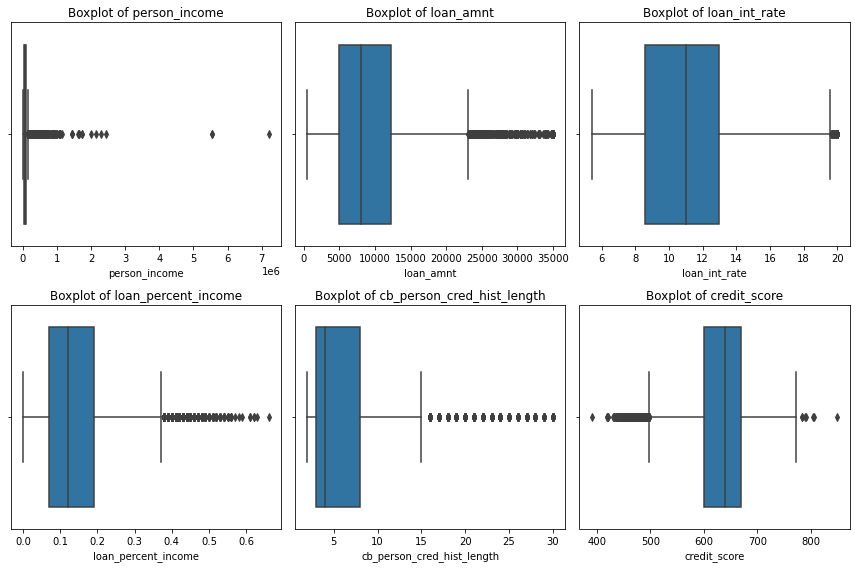

In [8]:
#using a boxplot

numerical_columns = [
    'person_income', 'loan_amnt', 'loan_int_rate', 
    'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]


plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()




# Step3.  Exploratory Data Analysis(EDA)

## Categorical columns

### (i) univariate analysis of the categorical columns

In [9]:
categorical = data.select_dtypes(include = ['object'])
categorical

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
person_age,,,,,
22.0,female,Master,RENT,PERSONAL,No
21.0,female,High School,OWN,EDUCATION,Yes
25.0,female,High School,MORTGAGE,MEDICAL,No
23.0,female,Bachelor,RENT,MEDICAL,No
24.0,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
27.0,male,Associate,RENT,MEDICAL,No
37.0,female,Associate,RENT,HOMEIMPROVEMENT,No
33.0,male,Associate,RENT,DEBTCONSOLIDATION,No


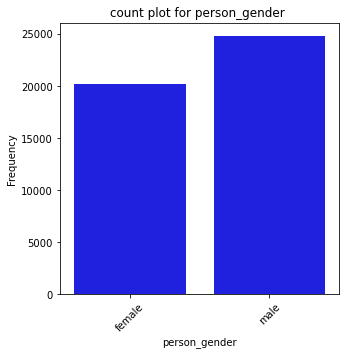

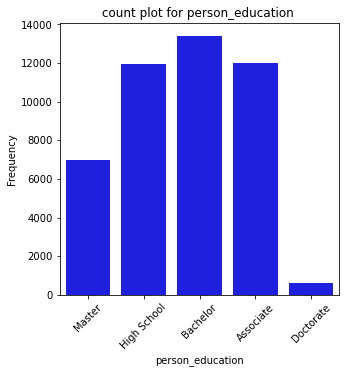

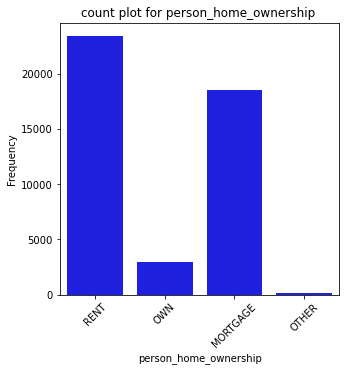

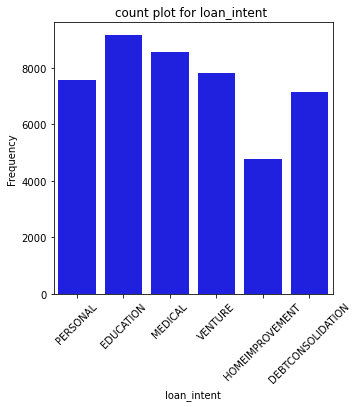

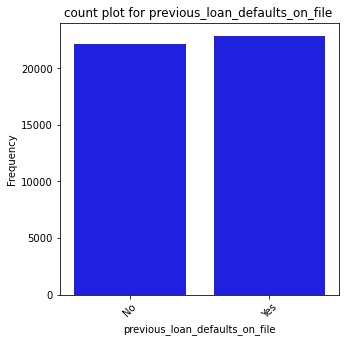

In [10]:
for column in categorical:
    plt.figure(figsize = (5,5))
    sns.countplot(x = categorical[column],data = categorical,color = "blue")
    plt.title(f"count plot for {column} ")
    plt.ylabel("Frequency")
    plt.xticks(rotation = 45)
    plt.xlabel(f"{column}")

### (ii) Bivariate analysis for categorical columns

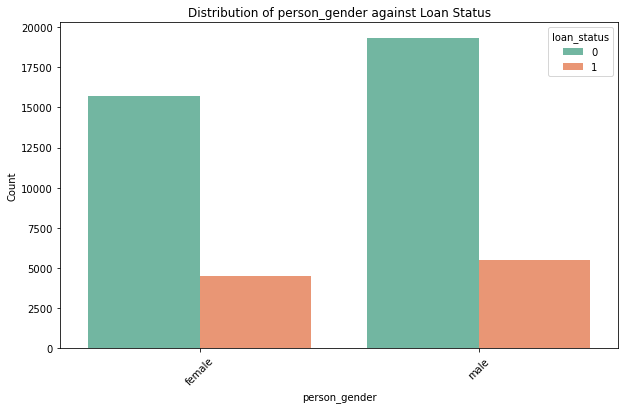

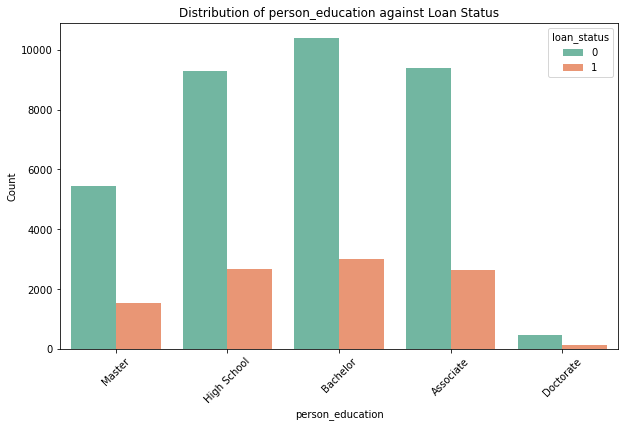

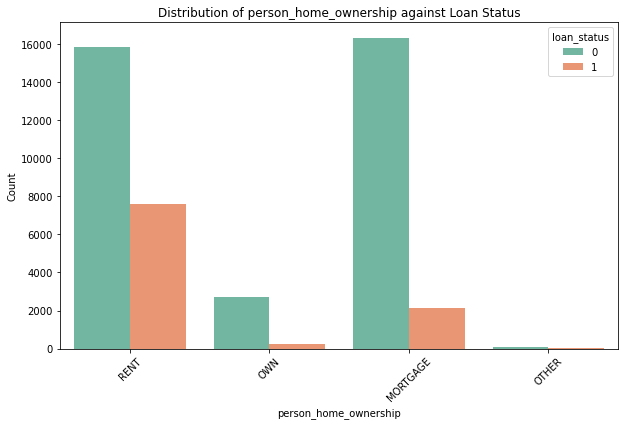

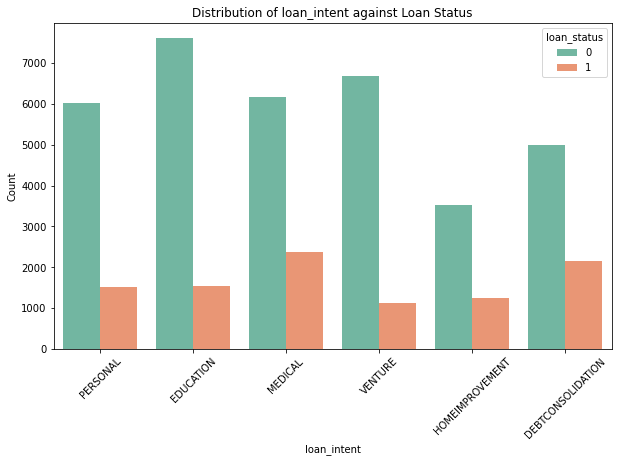

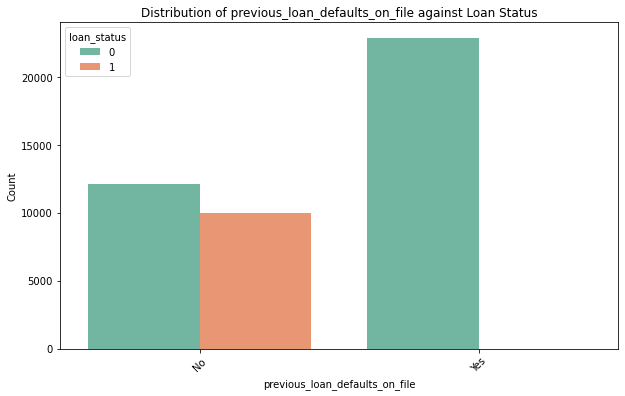

In [11]:
for column in categorical:
    plt.figure(figsize=(10, 6))  
    
    # Create a count plot for the current categorical column against loan_status
    sns.countplot(x=column, hue='loan_status', data=data, palette='Set2')
    
    plt.title(f"Distribution of {column} against Loan Status")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  
    plt.show()

## Numerical  Columns

In [12]:
numerical_columns = data.select_dtypes(include = "number")
numerical_columns = numerical_columns.drop(columns = ["loan_status","person_income"])

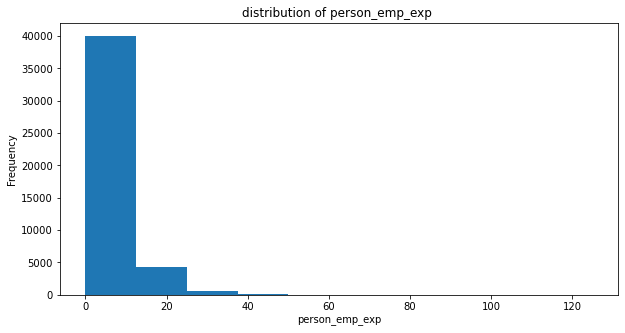

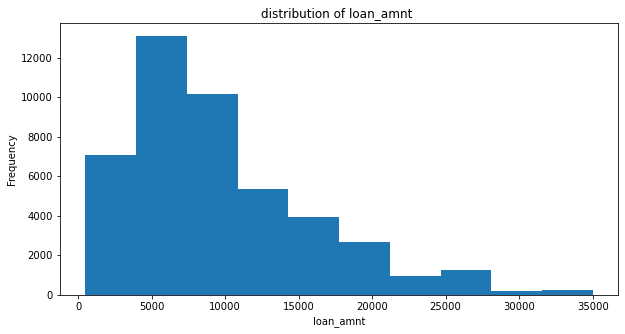

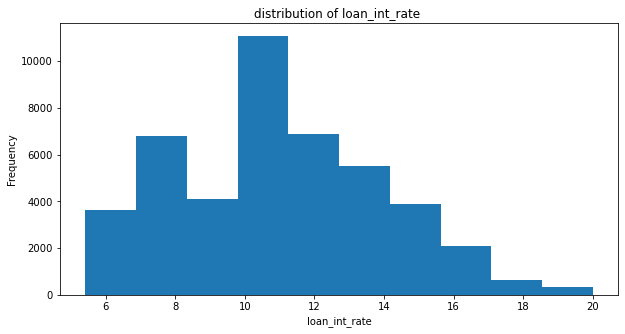

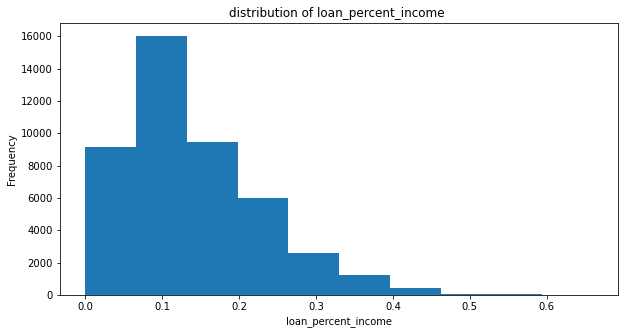

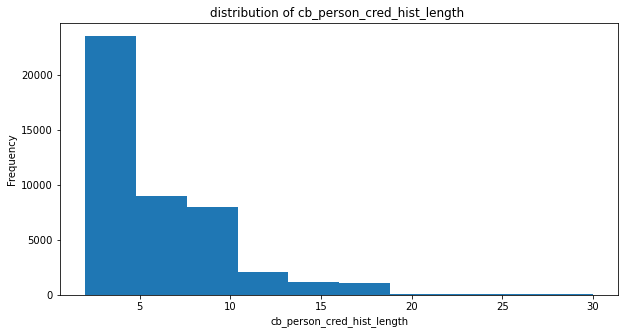

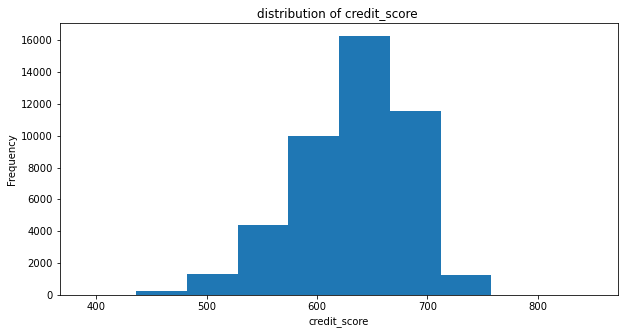

In [13]:
for column in numerical_columns:
    plt.figure(figsize = (10,5))
    plt.hist(data[column])
    plt.title(f"distribution of {column} ")
    plt.xlabel(f"{column}")
    plt.ylabel("Frequency")
    plt.show()

In [14]:
correlation = data.corr()
correlation

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_income,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


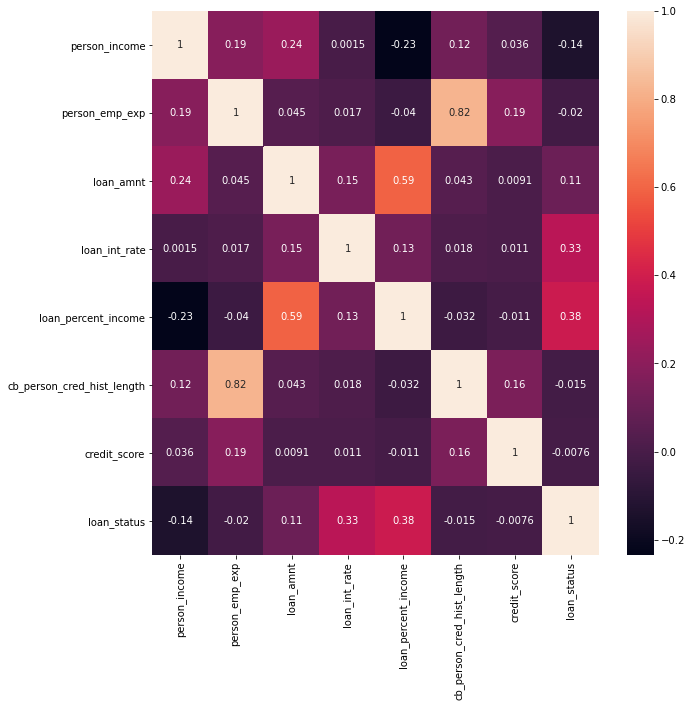

In [15]:
# Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation,annot = True)
plt.show()

### A scatterplot to see if wealthy individuals are borrowing larger amounts of Money

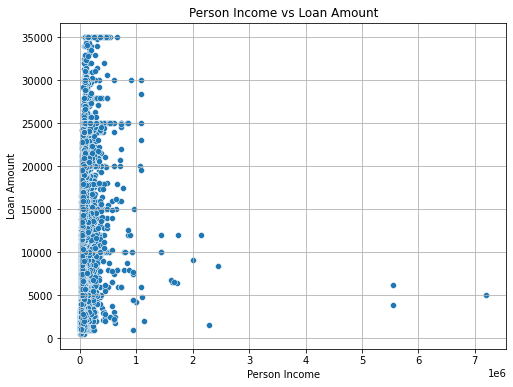

In [16]:
# person_income vs loan_amnt
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['person_income'], y=data['loan_amnt'])
plt.title('Person Income vs Loan Amount')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


### A FacetGrid to show how numerical features are distributed across a categorical Variable(loan_status)

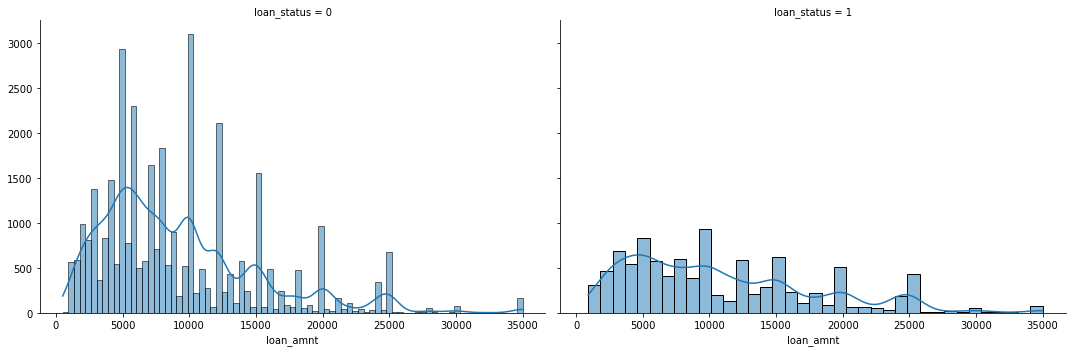

In [17]:
g = sns.FacetGrid(data, col="loan_status", height=5, aspect=1.5)
g.map(sns.histplot, 'loan_amnt', kde=True)
plt.show()

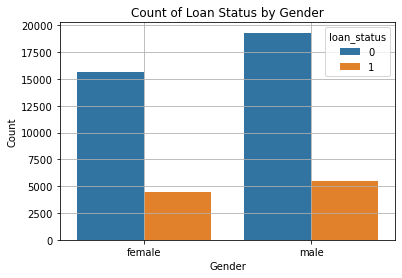

In [18]:
# Gender and count of loan status, bar plot

sns.countplot(data=data, x='person_gender', hue='loan_status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Loan Status by Gender')
plt.grid(True)
plt.show()





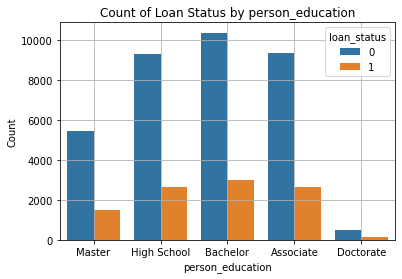

In [19]:
# personal_education and count of loan status, bar plot
sns.countplot(data=data, x='person_education', hue='loan_status')
plt.xlabel('person_education')
plt.ylabel('Count')
plt.title('Count of Loan Status by person_education')
plt.grid(True)
plt.show()

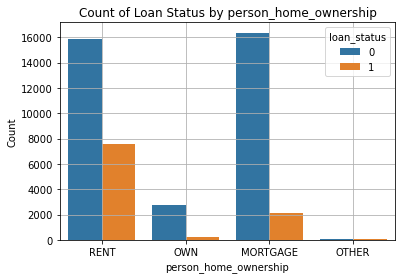

In [20]:
# person_home_ownership and count of loan status, bar plot
sns.countplot(data=data, x='person_home_ownership', hue='loan_status')
plt.xlabel('person_home_ownership')
plt.ylabel('Count')
plt.title('Count of Loan Status by person_home_ownership')
plt.grid(True)
plt.show()

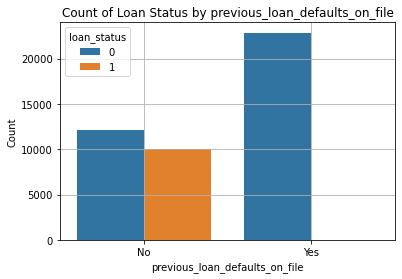

In [21]:
# previous_loan_defaults_on_file and count of loan status, bar plot
sns.countplot(data=data, x='previous_loan_defaults_on_file', hue='loan_status')
plt.xlabel('previous_loan_defaults_on_file')
plt.ylabel('Count')
plt.title('Count of Loan Status by previous_loan_defaults_on_file')
plt.grid(True)
plt.show()

# Step4. Data Preprocessing

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 45000 entries, 22.0 to 24.0
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_gender                   45000 non-null  object 
 1   person_education                45000 non-null  object 
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  object 
 5   loan_amnt                       45000 non-null  float64
 6   loan_intent                     45000 non-null  object 
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  object 
 12  loan_status                 

### handling Categorical data

Converting person_gender, person_education(ordinal), person_home_ownership, loan_intent, and previous_loan_defaults_on_file  to numerical values using encoding techniques.(OneHotEncoding and label coding for nominal and ordinal categories respectifully)

In [23]:

categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']


data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)


data.head()



,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
person_age,,,,,,,,,,,,,,,,,,,,,
22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,1,0,...,0,1,0,0,0,0,1,0,1,0
21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,1,0,...,1,0,0,1,0,0,0,0,0,1
25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1,0,...,0,0,0,0,0,1,0,0,1,0
23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1,0,...,0,1,0,0,0,1,0,0,1,0
24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Feature scaling
standardizing / normalizing the features to ensure they all contribute to the model

In [27]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Apply Standard Scaling
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


### splitting the dataset

In [25]:
# Data preprocessing
# feature scaling
# transformation

In [26]:
# Logistic Regression
# Decision tree
# Random Forest